In [1]:
import time
start_time = time.time()
import progressbar
import os
import numpy as np
from keras.preprocessing import image
import cv2
import dlib
import pandas as pd
import matplotlib.pyplot as plt
import sys

Using TensorFlow backend.


In [2]:
from keras.preprocessing import image
from sklearn import svm, datasets
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, ShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt

In [3]:
cwd = os.getcwd()

print(cwd)

C:\Users\User\Desktop\4th_year_AMLS\AMLS_19-20_ChinYangTan_16053203\Project_AMLS_19-20_16053203\Notebook\A2


In [4]:
import landmarks_v2 as l2

In [5]:
def get_data():
    return l2.extract_features_labels()
    
def split_data(X, Y):

    X, Y = shuffle(X,Y)
    tr_X, te_X, tr_Y, te_Y = train_test_split(X, Y, train_size=0.7)
    
    return tr_X, tr_Y, te_X, te_Y

In [6]:
X,y = get_data()

print(X.shape)
print(y.shape)

(4798, 68, 2)
(4798,)


In [7]:
print (os.path.abspath(os.curdir))
# sklearn functions implementation
def img_SVM(training_images, training_labels, test_images, test_labels):
    #classifier = ...
    classifier = SVC(kernel = 'rbf')
    classifier.fit(training_images, training_labels)
    pred = classifier.predict(test_images)
    print("Accuracy:", accuracy_score(test_labels, pred))

    print(pred)
    return pred

C:\Users\User\Desktop\4th_year_AMLS\AMLS_19-20_ChinYangTan_16053203\Project_AMLS_19-20_16053203\Notebook\A2


In [8]:
Y = np.array([y, -(y - 1)]).T

tr_X, tr_Y, te_X, te_Y = split_data(X, Y)

In [9]:
print(tr_X)
print(tr_X.shape)
print(tr_Y)
print(tr_Y.shape)

[[[ 56 113]
  [ 56 123]
  [ 58 133]
  ...
  [ 90 155]
  [ 86 156]
  [ 82 155]]

 [[ 45 115]
  [ 45 127]
  [ 46 139]
  ...
  [ 94 156]
  [ 88 156]
  [ 83 156]]

 [[ 55 118]
  [ 53 128]
  [ 52 138]
  ...
  [ 88 162]
  [ 83 162]
  [ 79 161]]

 ...

 [[ 38 109]
  [ 40 123]
  [ 42 136]
  ...
  [ 95 160]
  [ 90 162]
  [ 84 162]]

 [[ 44 106]
  [ 44 119]
  [ 46 131]
  ...
  [ 93 158]
  [ 87 159]
  [ 82 158]]

 [[ 47 112]
  [ 47 124]
  [ 48 136]
  ...
  [ 93 160]
  [ 87 160]
  [ 82 159]]]
(3358, 68, 2)
[[ 0.  1.]
 [ 1. -0.]
 [ 1. -0.]
 ...
 [ 1. -0.]
 [ 1. -0.]
 [ 1. -0.]]
(3358, 2)


In [10]:
def reshapeX(X):
    return X.reshape((X.shape[0], X.shape[1] * X.shape[2]))

def reshapeY(y):
    return list(zip(*y))[0]

tr_X = reshapeX(tr_X)
te_X = reshapeX(te_X)
tr_Y = reshapeY(tr_Y)
te_Y = reshapeY(te_Y)

In [11]:
print(tr_X.shape)

(3358, 136)


In [12]:
gamma='scale'

for C in [0.1,1]:
    for degree in [1, 2, 3, 4]:
                
        lin_svc = svm.SVC(kernel='linear', C=C).fit(tr_X, tr_Y)
        print(C, "Linear:", lin_svc.score(te_X, te_Y))

        rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(tr_X, tr_Y)
        print( C, gamma, "Rbf:", rbf_svc.score(te_X, te_Y))

        poly_svc = svm.SVC(kernel='poly', degree=degree, C=C).fit(tr_X, tr_Y)
        print( C, degree, "Poly", poly_svc.score(te_X, te_Y))

0.1 Linear: 0.8930555555555556
0.1 scale Rbf: 0.8666666666666667
0.1 1 Poly 0.8597222222222223
0.1 Linear: 0.8930555555555556
0.1 scale Rbf: 0.8666666666666667
0.1 2 Poly 0.8916666666666667
0.1 Linear: 0.8930555555555556
0.1 scale Rbf: 0.8666666666666667
0.1 3 Poly 0.9034722222222222
0.1 Linear: 0.8930555555555556
0.1 scale Rbf: 0.8666666666666667
0.1 4 Poly 0.9027777777777778
1 Linear: 0.8895833333333333
1 scale Rbf: 0.8895833333333333
1 1 Poly 0.8881944444444444
1 Linear: 0.8895833333333333
1 scale Rbf: 0.8895833333333333
1 2 Poly 0.9041666666666667
1 Linear: 0.8895833333333333
1 scale Rbf: 0.8895833333333333
1 3 Poly 0.9034722222222222
1 Linear: 0.8895833333333333
1 scale Rbf: 0.8895833333333333
1 4 Poly 0.8958333333333334


In [13]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC as svc
from sklearn.metrics import make_scorer, roc_auc_score
from scipy import stats

In [14]:
# svc_list = []

# lin_svc = svm.SVC(kernel='linear', C=C).fit(tr_X, tr_Y)
# # print(C, "Linear:", lin_svc.score(te_X, te_Y))

# rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=C).fit(tr_X, tr_Y)
# # print( C, gamma, "Rbf:", rbf_svc.score(te_X, te_Y))

# poly_svc = svm.SVC(kernel='poly', degree=degree, C=C).fit(tr_X, tr_Y)
# # print( C, degree, "Poly", poly_svc.score(te_X, te_Y))

# svc_list.append({
#     'lin_svc': lin_svc,
#     'rbf_svc': rbf_svc,
#     'poly_svc': poly_svc,
#     'C': C,
#     'gamma': gamma,
#     'degree': degree
# })

# #define model and performance measure
# svc_list=svc(probability=True, random_state=1)
# auc=make_scorer(roc_auc_score)

# #random search for 20 combinations of parameters
# rand_list = {"C":stats.uniform(2,10),
#             "gamma":stats.uniform(0.1,1),
#             "degree":stats.uniform(1,3)}

# rand_search = RandomizedSearchCV(svc_list, param_distributions = rand_list, n_iter=20, n_jobs=4, cv=3, random_state=2017, scoring=auc)
# rand_search.fit(tr_X, tr_Y)
# rand_search.cv_results_

# print(rand_search.best_params_)

In [15]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, roc_auc_score

lin = {'C': stats.uniform(0.1, 10), 'kernel': ['linear']}

rbf = {'C': stats.uniform(0.1, 10), 'gamma': stats.uniform(0.0001, 0.01), 'kernel': ['rbf']}

poly = {'C': stats.uniform(0.1, 10), 'degree': stats.uniform(1, 4), 'kernel': ['poly']}

def randomSearch(X, y, param_kernel):
    param_distributions = param_kernel #a dictionary with parameters names (string) as keys of parameters to try
    #number of jobs = -1 is using all processors 
    #n_iter trades off runtime with quality of solution
    #cv is at default value for 5-fold cross validation
    #verbose gives out messages; refit is to refit an estimator to find the best parameters
    #random_state is a pseudo random number generator used for random uniform sampling from list of possible values instead of using scipy.stats distributions
    searchrand = RandomizedSearchCV(SVC(), param_distributions, n_iter=10, n_jobs=-1, refit=True, verbose=3)
    searchrand.fit(X, y)
    searchrand.cv_results_
    
    print(searchrand.cv_results_)
    return searchrand.best_params_, searchrand.best_estimator_  

# Obtaining optimum hyperparameters and classifier for different kernel
linSVC_param, lin_SVC = randomSearch(tr_X, tr_Y, lin)
rbfSVC_param, rbf_SVC = randomSearch(tr_X, tr_Y, rbf)
polySVC_param, poly_SVC = randomSearch(tr_X, tr_Y, poly)
#print(datetime.now() - start)

# Display optimum hyperparameters for SVC kernel
print('Optimum hyperparameters for linear kernel: ')
print(linSVC_param)
print('Optimum hyperparameters for rbf kernel: ')
print(rbfSVC_param)
print('Optimum hyperparameters for polynomial kernel: ')
print(polySVC_param)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 42.8min finished


{'mean_fit_time': array([503.6106194 ,  31.89705377, 213.8684608 , 156.56445527,
       271.89941797, 310.9730649 , 770.67531948, 420.73134494,
       627.88638587, 477.21278992]), 'std_fit_time': array([ 24.75830713,   5.72734096,  24.08845656,  31.8000069 ,
        39.25703067,  46.19000928, 120.3238544 ,  96.65194713,
       106.41434967,  98.49876742]), 'mean_score_time': array([0.18772378, 0.14301777, 0.20310087, 0.28224502, 0.39170074,
       0.48558593, 0.30946374, 0.36786838, 0.20830622, 0.16883855]), 'std_score_time': array([0.02484699, 0.02075414, 0.04011765, 0.08180206, 0.0999511 ,
       0.18095066, 0.09923869, 0.17037357, 0.0799794 , 0.0881889 ]), 'param_C': masked_array(data=[8.193838322849384, 0.8333853423326708,
                   3.5844333822906282, 2.3287232844877406,
                   3.8774447792218933, 3.853517142786743,
                   8.745561322366033, 4.761718202630202, 9.87290538339174,
                   8.916128071024096],
             mask=[False, False

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   55.5s finished


{'mean_fit_time': array([ 6.8739665 ,  9.14824953,  8.12790022,  2.67695107,  4.23452401,
        6.46712618,  8.1247366 , 10.79764695,  6.84262567,  7.44769607]), 'std_fit_time': array([1.00466242, 0.77880311, 0.52060616, 0.09242362, 0.24131169,
       0.65047208, 0.66318372, 0.76395492, 0.85479065, 0.91451273]), 'mean_score_time': array([0.81024456, 1.46269088, 1.26920519, 0.22723203, 0.56661181,
       0.68484926, 1.58317752, 2.02083497, 1.15327773, 0.59506006]), 'std_score_time': array([0.15954108, 0.1522487 , 0.08325966, 0.02127664, 0.09009461,
       0.09454846, 0.41462565, 0.40893755, 0.43495405, 0.20009913]), 'param_C': masked_array(data=[4.634362818391471, 5.835447158873677,
                   5.242686013318976, 6.402488354995975,
                   4.659428530969585, 7.863367432408619,
                   5.021045289641102, 6.023789742275669,
                   2.2793471805909093, 1.5649650241243451],
             mask=[False, False, False, False, False, False, False, False,
 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


{'mean_fit_time': array([ 7.47763104,  3.68451204, 31.51792502,  7.28280864,  3.44556832,
        3.38446546,  5.46482234, 10.84618959,  3.86223917, 21.66822133]), 'std_fit_time': array([0.55318645, 0.57193907, 5.02736171, 1.03752046, 1.18435118,
       0.46851038, 0.3591097 , 0.7184417 , 0.91883647, 2.24968825]), 'mean_score_time': array([0.58114114, 0.54740953, 0.3165369 , 0.53508768, 0.61761007,
       0.37808714, 0.49619827, 0.38456316, 0.63762503, 0.25779219]), 'std_score_time': array([0.06248816, 0.24948036, 0.07736917, 0.18422331, 0.20307582,
       0.11642233, 0.07023439, 0.12487836, 0.08384432, 0.01268966]), 'param_C': masked_array(data=[1.9341458205078887, 4.882043580668681,
                   10.04031915982277, 8.087491346717634, 8.62379260846326,
                   3.308514506667336, 0.7083431712332598,
                   2.58582607426545, 2.653888732737569, 9.095590250329378],
             mask=[False, False, False, False, False, False, False, False,
                   Fal

In [16]:
print(lin_SVC.score(te_X, te_Y))
print(rbf_SVC.score(te_X, te_Y))
print(poly_SVC.score(te_X, te_Y))

0.8895833333333333
0.9027777777777778
0.9034722222222222


In [17]:
import landmarks_v2_test as l1 

In [18]:
def get_data():
    return l1.extract_features_labels()

In [19]:
A,b = get_data()

print(A.shape)
print(b.shape)

(970, 68, 2)
(970,)


In [20]:
B = np.array([b, -(b - 1)]).T
def reshapeX(A):
    return A.reshape((A.shape[0], A.shape[1] * A.shape[2]))

def reshapeY(b):
    return list(zip(*b))[0]

te_A = reshapeX(A)
te_B = reshapeY(B)

Automatically created module for IPython interactive environment


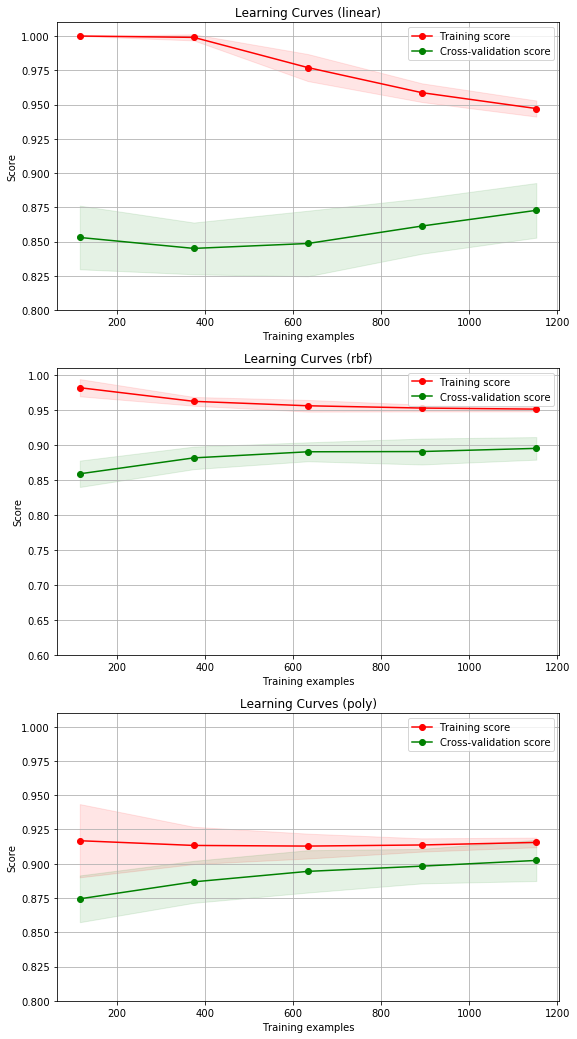

In [27]:
print(__doc__)

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
        axes.set_xlabel("Training examples")
        axes.set_ylabel("Score")

        train_sizes, train_scores, test_scores, fit_times, _ = \
            learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                           train_sizes=train_sizes,
                           return_times=True)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        fit_times_mean = np.mean(fit_times, axis=1)
        fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
        axes.grid()
        axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                             train_scores_mean + train_scores_std, alpha=0.1,
                             color="r")
        axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                             test_scores_mean + test_scores_std, alpha=0.1,
                             color="g")
        axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                     label="Training score")
        axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                     label="Cross-validation score")
        axes.legend(loc="best")

    return plt

plt.figure(figsize=(9,18))

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)


# estimator = poly_SVC 
# plot_learning_curve(estimator, title, te_X, te_Y, axes=axes, ylim=(0.8, 1.01), cv=cv, n_jobs=-1)
axes = plt.subplot(311)
title = r"Learning Curves (linear)"
plot_learning_curve(lin_SVC, title, te_X, te_Y, axes=axes, ylim=(0.8, 1.01), cv=cv, n_jobs=-1)

axes = plt.subplot(312)
title = r"Learning Curves (rbf)"
plot_learning_curve(rbf_SVC, title, te_X, te_Y, axes=axes, ylim=(0.6, 1.01), cv=cv, n_jobs=-1)

axes = plt.subplot(313)
title = r"Learning Curves (poly)"
plot_learning_curve(poly_SVC, title, te_X, te_Y, axes=axes, ylim=(0.8, 1.01), cv=cv, n_jobs=-1)


plt.show()

[[426  47]
 [ 51 446]]

Confusion Matrix


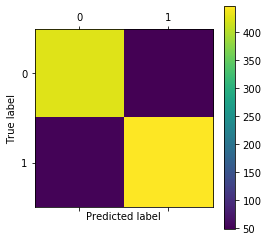

[[0.43917526 0.04845361]
 [0.05257732 0.45979381]]

Confusion Matrix(normalised)


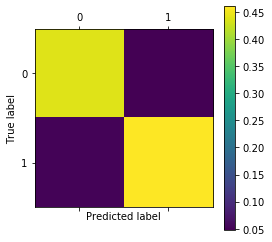

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90       473
         1.0       0.90      0.90      0.90       497

    accuracy                           0.90       970
   macro avg       0.90      0.90      0.90       970
weighted avg       0.90      0.90      0.90       970

Accuracy achieved: 0.8989690721649485 ♡♡♡


In [21]:
# op_lin_results = optimised_lin.predict(te_X)
op_lin_results = lin_SVC.predict(te_A)

# cm = confusion_matrix(te_Y, op_lin_results)
cm = confusion_matrix(te_B, op_lin_results)
print(cm)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix')
plt.show()

# cm2 = confusion_matrix(te_Y, op_lin_results, normalize='all')
cm2 = confusion_matrix(te_B, op_lin_results, normalize='all')
print(cm2)
plt.matshow(cm2)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix(normalised)')
plt.show()

print(classification_report(te_B, op_lin_results))
print('Accuracy achieved:', accuracy_score(te_B, op_lin_results), '\u2661''\u2661''\u2661')

[[432  41]
 [ 51 446]]

Confusion Matrix


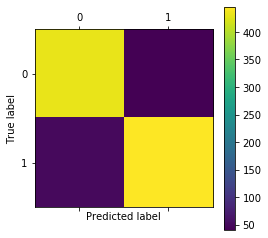

[[0.44536082 0.04226804]
 [0.05257732 0.45979381]]

Confusion Matrix(normalised)


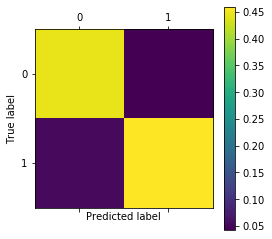

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       473
         1.0       0.92      0.90      0.91       497

    accuracy                           0.91       970
   macro avg       0.91      0.91      0.91       970
weighted avg       0.91      0.91      0.91       970

Accuracy achieved: 0.9051546391752577 ♡♡♡


In [22]:
# optimised_rbf = svm.SVC(kernel = 'rbf', gamma = rbfSVC_param['gamma'], C = rbfSVC_param['C'])
# optimised_rbf.fit(tr_X, tr_Y)
# op_rbf_results = optimised_rbf.predict(te_X)
op_rbf_results = rbf_SVC.predict(te_A)

# cm = confusion_matrix(te_Y, op_rbf_results)
cm = confusion_matrix(te_B, op_rbf_results)
print(cm)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix')
plt.show()

# cm2 = confusion_matrix(te_Y, op_rbf_results, normalize='all')
cm2 = confusion_matrix(te_B, op_rbf_results, normalize='all')
print(cm2)
plt.matshow(cm2)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix(normalised)')
plt.show()

print(classification_report(te_B, op_rbf_results))
print('Accuracy achieved:', accuracy_score(te_B, op_rbf_results), '\u2661''\u2661''\u2661')

[[429  44]
 [ 47 450]]

Confusion Matrix


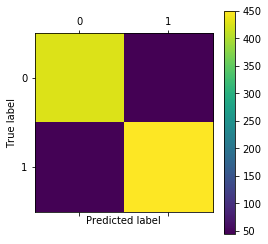

[[0.44226804 0.04536082]
 [0.04845361 0.46391753]]

Confusion Matrix(normalised)


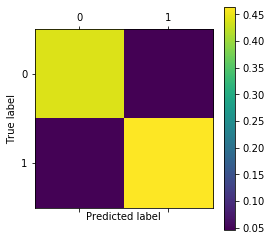

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90       473
         1.0       0.91      0.91      0.91       497

    accuracy                           0.91       970
   macro avg       0.91      0.91      0.91       970
weighted avg       0.91      0.91      0.91       970

Accuracy achieved: 0.9061855670103093 ♡♡♡


In [23]:
# optimised_poly = svm.SVC(kernel = 'poly', degree = polySVC_param['degree'], C = polySVC_param['C'])
# optimised_poly.fit(tr_X, tr_Y)
# op_p_results = optimised_poly.predict(te_X)
op_p_results = poly_SVC.predict(te_A)

# cm = confusion_matrix(te_Y, op_p_results)
cm = confusion_matrix(te_B, op_p_results)
print(cm)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix')
plt.show()

# cm2 = confusion_matrix(te_Y, op_p_results, normalize='all')
cm2 = confusion_matrix(te_B, op_p_results, normalize='all')
print(cm2)
plt.matshow(cm2)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix(normalised)')
plt.show()

print(classification_report(te_B, op_p_results))
print('Accuracy achieved:', accuracy_score(te_B, op_p_results), '\u2661''\u2661''\u2661')

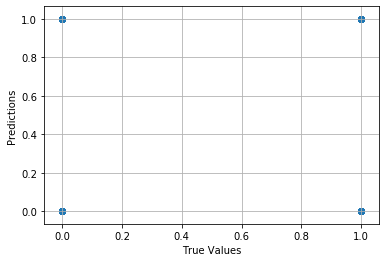

In [24]:
plt.scatter(te_B, op_p_results)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid()
plt.show()

In [26]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 3174.210713624954 seconds ---
